# 第四次作業

In [57]:
# 14.90, 14.96, 14.106, 14.108

In [58]:
# 載入所需函示庫
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 120

For all below histogram, qqplot, shapiro test<br>
Hypothesis<br>
H0: the datas are normally distributed<br>
H1: they're not normally distributed<br>
<br>
Below we use residuals to conduct Bartlett's test to check equal variance assumption.<br>
Hypothesis: <br>
H0: Variance of different treatment groups are equal. <br>
H1: At least two treatment groups have different variance.

<div style="background-color:#D9D9D9;"><font size="5"> 14.90</font></div>

Hypothesis: <br>
H0: The means of pounds each person lost between different subjects are the same.  <br>
H1: At least two means differ.

In [59]:
df = pd.read_excel('Xr14-90.xlsx')
#df1 = pd.melt(df, id_vars=['Diet', 'Block'])
df

,Unnamed: 0,Diet 1,Diet 2,Diet 3,Diet 4
0,Block 1,5,2,6,8
1,Block 2,4,7,8,10
2,Block 3,6,12,9,2
3,Block 4,7,11,16,7
4,Block 5,9,8,15,14


In [60]:
df = df.rename(columns = {  "Unnamed: 0" : "Block",
                            "Diet 1": "grade_a", 
                            "Diet 2": "grade_b", 
                            "Diet 3": "grade_c", 
                            "Diet 4": "grade_d"}) 
df2 = pd.wide_to_long(df, ["grade"], sep = "_", suffix = '\w+', i="Block", j="factor").reset_index()
display(df2)

results = smf.ols('grade ~ C(factor) + C(Block)', data=df2).fit()
# results.summary()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,Block,factor,grade
0,Block 1,a,5
1,Block 2,a,4
2,Block 3,a,6
3,Block 4,a,7
4,Block 5,a,9
5,Block 1,b,2
6,Block 2,b,7
7,Block 3,b,12
8,Block 4,b,11
9,Block 5,b,8


,sum_sq,df,F,PR(>F)
C(factor),53.8,3.0,1.652842,0.229629
C(Block),102.2,4.0,2.354839,0.112507
Residual,130.2,12.0,NaN,NaN


The p-value for different factor is 0.2296 > alpha=0.01, so we cannot reject the null hypothesis. There is no enough evidence to infer that there are differences in the losing pounds between subjects being measured.


### To check the normality assumption, compute the residuals, plot histogram and Q-Q plot, and conduct Shapiro test.

The histogram looks like a bell-shaped distribution.


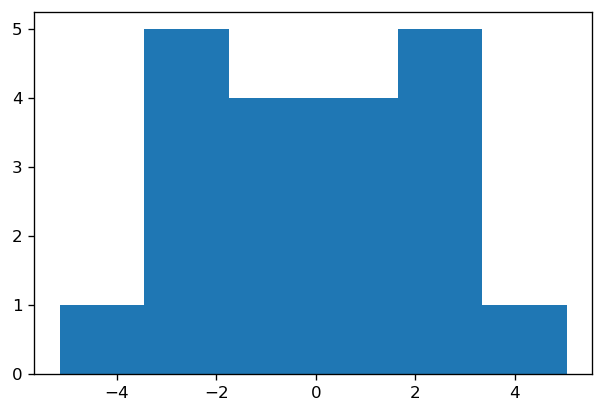

In [61]:
_ = plt.hist(results.resid, bins='auto')
print("The histogram looks like a bell-shaped distribution.")

Q-Q Plot does show that all data points are close to the 45 degree line.


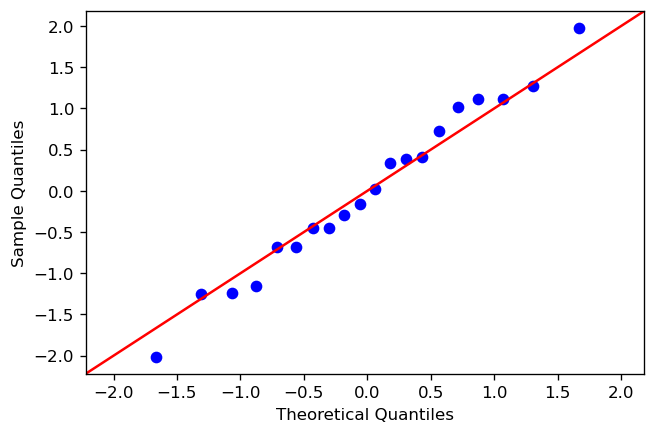

In [62]:
fig = sm.qqplot(results.resid, stats.norm, fit=True, line='45')
print("Q-Q Plot does show that all data points are close to the 45 degree line.")

In [63]:
stat, p = stats.shapiro(results.resid)
print('Statistics=%.4f, p=%.4f' % (stat, p))
print("The null hyptoehsis of Shapiro-Wilk test is that the data is normally distributed.The testing result shows that the null hyphosis cannot be rejected. As a result, we conclude that the normality assumption is satisfied.")

Statistics=0.9826, p=0.9630
The null hyptoehsis of Shapiro-Wilk test is that the data is normally distributed.The testing result shows that the null hyphosis cannot be rejected. As a result, we conclude that the normality assumption is satisfied.


In [64]:
print("As a result, we cannot reject H0. The result suggest that equal variance assumption is not violated.")
df2['resid'] = results.resid
stats.bartlett(df2['resid'][df2['factor'] == 'a'], 
               df2['resid'][df2['factor'] == 'b'], 
               df2['resid'][df2['factor'] == 'c'],
               df2['resid'][df2['factor'] == 'd'])

As a result, we cannot reject H0. The result suggest that equal variance assumption is not violated.


BartlettResult(statistic=4.290136711862416, pvalue=0.23179100656950327)

<div style="background-color:#D9D9D9;"><font size="5"> 14.96</font></div>

Hypothesis: <br>
H0: The differences in the amount of patient care between medical specialties are the same<br>
H1: At least two means differ.

In [65]:
df = pd.read_excel('Xr14-96.xlsx')
df.head()

,Age,General,Internal,Surgery,Pediatrics,Obs/Gyn
0,30,54.0,56.7,55.7,58.3,60.6
1,31,54.9,61.8,61.5,50.7,65.2
2,32,55.5,46.6,59.5,56.4,63.2
3,33,37.0,44.6,40.8,51.4,37.3
4,34,52.0,63.8,44.9,52.5,56.6


In [66]:
df = df.rename(columns = {  "General":"grade_a",
                            "Internal ": "grade_b", 
                            "Surgery": "grade_c", 
                            "Pediatrics": "grade_d", 
                            "Obs/Gyn": "grade_e"}) 
df2 = pd.wide_to_long(df, ["grade"], sep = "_", suffix = '\w+', i="Age", j="factor").reset_index()
display(df2.head())

results = smf.ols('grade ~ C(factor) + C(Age)', data=df2).fit()
# results.summary()
aov_table = sms.anova_lm(results, typ=2)
aov_table

,Age,factor,grade
0,30,a,54.0
1,31,a,54.9
2,32,a,55.5
3,33,a,37.0
4,34,a,52.0


,sum_sq,df,F,PR(>F)
C(factor),1406.390222,4.0,10.715019,1.322412e-07
C(Age),7309.684000,35.0,6.364696,9.352614e-16
Residual,4593.893778,140.0,NaN,NaN


(a.)The p-value for different factor is far below alpha=0.05, so we reject the null hypothesis. There is enough evidence to infer that the differences in the amount of patient care between medical specialties differ.
<br>
(b.)Blocking by age is appropriate, Sine the p-value is both minimal ,and below the anova test in the factor we discuss.


### To check the normality assumption, compute the residuals, plot histogram and Q-Q plot, and conduct Shapiro test.

The histogram looks like a bell-shaped distribution.


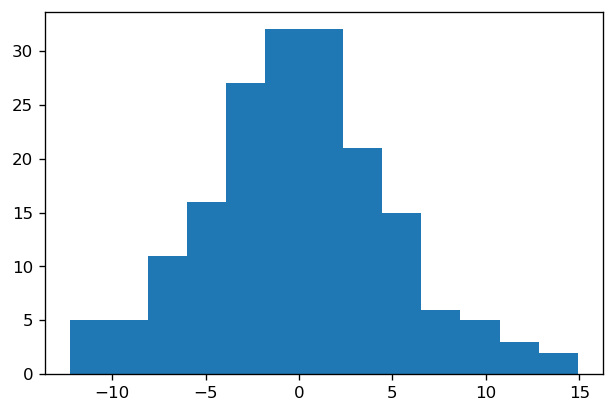

In [67]:
_ = plt.hist(results.resid, bins='auto')
print("The histogram looks like a bell-shaped distribution.")

Q-Q Plot does show that almost all data points are close to the 45 degree line.


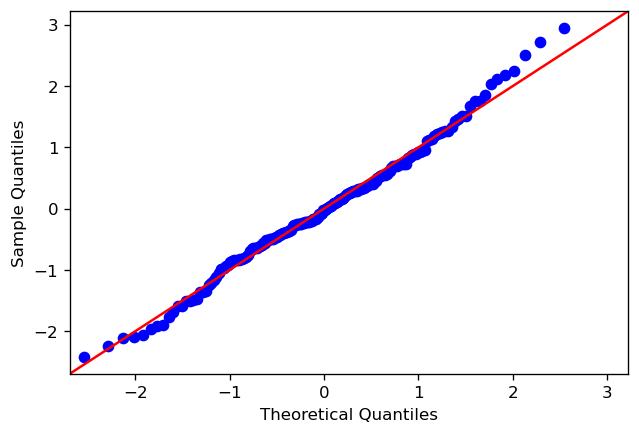

In [68]:
fig = sm.qqplot(results.resid, stats.norm, fit=True, line='45')
print("Q-Q Plot does show that almost all data points are close to the 45 degree line.")

In [69]:
stat, p = stats.shapiro(results.resid)
print('Statistics=%.4f, p=%.4f' % (stat, p))
print("The null hyptoehsis of Shapiro-Wilk test is that the data is normally distributed.The testing result shows that the null hyphosis cannot be rejected. As a result, we conclude that the normality assumption is satisfied.")

Statistics=0.9917, p=0.3865
The null hyptoehsis of Shapiro-Wilk test is that the data is normally distributed.The testing result shows that the null hyphosis cannot be rejected. As a result, we conclude that the normality assumption is satisfied.


In [70]:
print("As a result, we reject H0. The result suggest that equal variance assumption is violated.")
print("We may not fully trust the ANOVA test above.")
df2['resid'] = results.resid
stats.bartlett(df2['resid'][df2['factor'] == 'a'], 
               df2['resid'][df2['factor'] == 'b'], 
               df2['resid'][df2['factor'] == 'c'],
               df2['resid'][df2['factor'] == 'd'],
               df2['resid'][df2['factor'] == 'e'])

As a result, we reject H0. The result suggest that equal variance assumption is violated.
We may not fully trust the ANOVA test above.


BartlettResult(statistic=27.229766877854438, pvalue=1.7861856941414067e-05)

<div style="background-color:#D9D9D9;"><font size="5"> 14.106</font></div>

(a.) 12 treatments<br>
(b.) 2 factors<br>
(c.) Income group factor has 3 levels, Form factor has 4 levels.

In [71]:
df = pd.read_excel('Xr14-106.xlsx')
df.head()

,Group,Form 1,Form 2,Form 3,Form 4
0,1,43,84,72,81
1,1,57,64,113,152
2,1,53,115,111,95
3,1,58,37,104,71
4,1,72,94,118,138


In [72]:
df = df.rename(columns = {  "Form 1": "grade_a",
                            "Form 2": "grade_b", 
                            "Form 3": "grade_c", 
                            "Form 4": "grade_d"}) 
df["id"] = df.index
#display(df)
df2 = pd.wide_to_long(df, ["grade"], sep = "_", suffix = '\w+', i="id", j="factor").reset_index()
#display(df2)
df2 = df2.drop(columns =['id'])

In [73]:
result_interact = smf.ols('grade ~ C(factor) + C(Group) + C(factor):C(Group)', data=df2).fit()
# results.summary()
aov_interact = sms.anova_lm(result_interact, typ=2)
aov_interact

,sum_sq,df,F,PR(>F)
C(factor),6279.866667,3.0,2.562717,0.058572
C(Group),6718.716667,2.0,4.112707,0.018994
C(factor):C(Group),5101.883333,6.0,1.041000,0.402973
Residual,88217.000000,108.0,NaN,NaN


(d.)<br>
H0: Two factors do not interact to affect the mean responses.<br>
H1: Two factors do interact to affect the mean responses
<br>
From result above, we can't reject H0, there is no interaction between two factors.
<br>
(e.)<br>
H0: The means of time amount of Factor of forms are equal 
H1: At least two means differ
<br>
From result above, we can't reject H0, there is no significant difference between forms
<br>
(f.)<br>
H0: The means of time amount of Factor of earning bracket are equal 
H1: At least two means differ
<br>
From result above, we have enough evidence to reject H0 under alpha=0.05, in favor of H1,
<br>and conclude that different level of earning bracket differ in time to complete their tax forms.

the histogram looks like bell shape distribution
Q-Q plot is also approximately satisfied


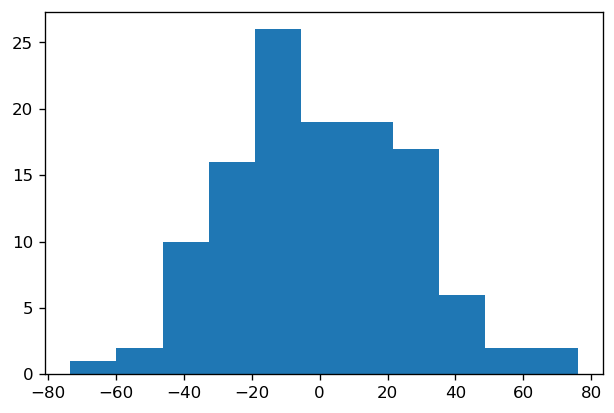

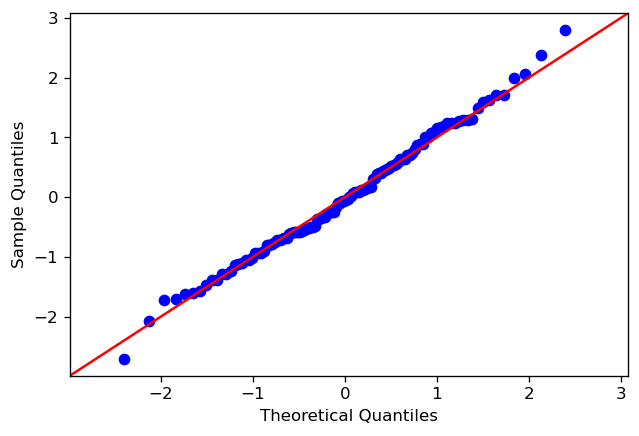

In [74]:
print("the histogram looks like bell shape distribution")
print("Q-Q plot is also approximately satisfied")
_ = plt.hist(result_interact.resid, bins='auto')
fig = sm.qqplot(result_interact.resid, stats.norm, 
                fit=True, line='45')

In [75]:
# Shapiro-Wilk normality test.
stat, p = stats.shapiro(result_interact.resid)
print('Statistics=%.4f, p=%.4f' % (stat, p))
print("we don't reject the null hypothesis")

Statistics=0.9941, p=0.8968
we don't reject the null hypothesis


In [76]:
df2['fac_gro'] = df2.factor + "_" + str(df2.Group)
# equal variance assumption
df2['resid'] = result_interact.resid
display(df2)


all_level = df2['fac_gro'].unique()
print("List of all levels: ", all_level)

data_list = []
for alevel in all_level:
    data_list.append(df2['resid'][df2['fac_gro'] == alevel])
print("There are %d samples collected" % len(data_list))

# Conduct Bartlett's Test
print("don't reject H0")
stats.bartlett(*data_list)

,factor,Group,grade,fac_gro,resid
0,a,1,43,a_0 1\n1 1\n2 1\n3 1\n4 ...,-30.3
1,a,1,57,a_0 1\n1 1\n2 1\n3 1\n4 ...,-16.3
2,a,1,53,a_0 1\n1 1\n2 1\n3 1\n4 ...,-20.3
3,a,1,58,a_0 1\n1 1\n2 1\n3 1\n4 ...,-15.3
4,a,1,72,a_0 1\n1 1\n2 1\n3 1\n4 ...,-1.3
...,...,...,...,...,...
115,d,3,158,d_0 1\n1 1\n2 1\n3 1\n4 ...,46.5
116,d,3,92,d_0 1\n1 1\n2 1\n3 1\n4 ...,-19.5
117,d,3,38,d_0 1\n1 1\n2 1\n3 1\n4 ...,-73.5
118,d,3,158,d_0 1\n1 1\n2 1\n3 1\n4 ...,46.5


List of all levels:  ['a_0      1\n1      1\n2      1\n3      1\n4      1\n      ..\n115    3\n116    3\n117    3\n118    3\n119    3\nName: Group, Length: 120, dtype: int64'
 'b_0      1\n1      1\n2      1\n3      1\n4      1\n      ..\n115    3\n116    3\n117    3\n118    3\n119    3\nName: Group, Length: 120, dtype: int64'
 'c_0      1\n1      1\n2      1\n3      1\n4      1\n      ..\n115    3\n116    3\n117    3\n118    3\n119    3\nName: Group, Length: 120, dtype: int64'
 'd_0      1\n1      1\n2      1\n3      1\n4      1\n      ..\n115    3\n116    3\n117    3\n118    3\n119    3\nName: Group, Length: 120, dtype: int64']
There are 4 samples collected
don't reject H0


BartlettResult(statistic=2.88713739968914, pvalue=0.409355685193349)

<div style="background-color:#D9D9D9;"><font size="5"> 14.108</font></div>

(a.) Factor A=Injection schedule, Factor B=Drug mixture<br>
(b.) response variables are responses by the forty patients<br>
(c.) Injection schedule has two level, Drug mixture has four

In [77]:
df = pd.read_excel('Xr14-108.xlsx')
df

,Schedule,Drug 1,Drug 2,Drug 3,Drug 4
0,Week,17,24,14,10
1,Week,6,15,9,-1
2,Week,10,10,12,0
3,Week,12,16,0,3
4,Week,14,14,6,-1
5,Two Days,18,-2,20,-2
6,Two Days,9,0,16,7
7,Two Days,17,17,12,10
8,Two Days,21,2,17,6
9,Two Days,15,6,18,7


In [78]:
df = df.rename(columns = {  "Drug 1": "grade_a",
                            "Drug 2": "grade_b", 
                            "Drug 3": "grade_c", 
                            "Drug 4": "grade_d"}) 
df["id"] = df.index
#display(df)
df2 = pd.wide_to_long(df, ["grade"], sep = "_", suffix = '\w+', i="id", j="factor").reset_index()
display(df2.head())

,id,factor,Schedule,grade
0,0,a,Week,17
1,1,a,Week,6
2,2,a,Week,10
3,3,a,Week,12
4,4,a,Week,14


In [79]:
result_interact = smf.ols('grade ~ C(factor) + C(Schedule) + C(factor):C(Schedule)', data=df2).fit()
# results.summary()
aov_interact = sms.anova_lm(result_interact, typ=2)
aov_interact

,sum_sq,df,F,PR(>F)
C(factor),581.8,3.0,7.711067,0.000516
C(Schedule),14.4,1.0,0.572565,0.454777
C(factor):C(Schedule),548.6,3.0,7.271040,0.000749
Residual,804.8,32.0,NaN,NaN


Interaction:<br>
H0: Two factors do not interact to affect the mean responses.<br>
H1: Two factors do interact to affect the mean responses
<br>
From result above, p-value for the interaction test is 0.0007, which is far smaller than our significant level,<br>so we can reject H0, there is indeed interaction between two factors, we can conclude that there is interaction between schedules and drug mixtures, and we no more have to do the another two factor test.

the histogram looks like bell shape distribution
Q-Q plot is also approximately satisfied


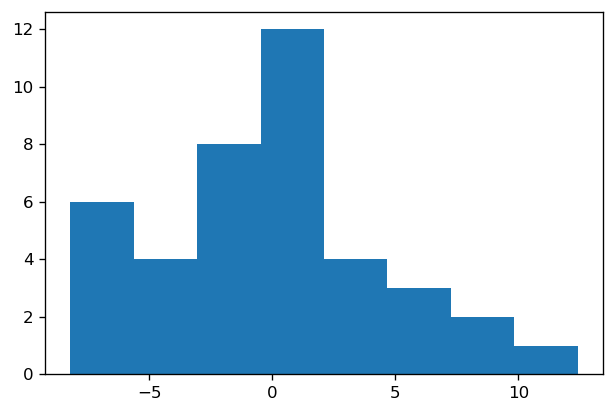

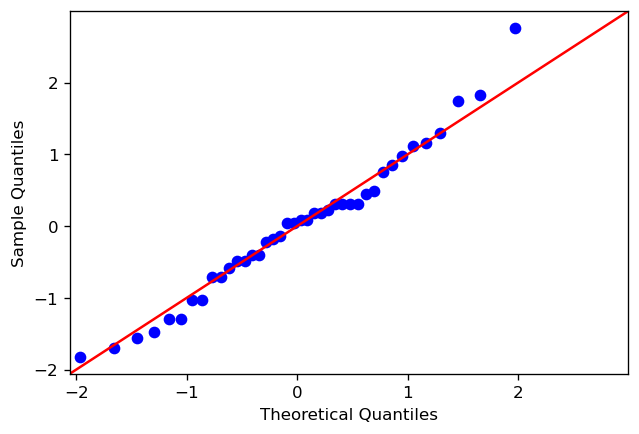

In [80]:
print("the histogram looks like bell shape distribution")
print("Q-Q plot is also approximately satisfied")
_ = plt.hist(result_interact.resid, bins='auto')
fig = sm.qqplot(result_interact.resid, stats.norm, 
                fit=True, line='45')

In [81]:
# Shapiro-Wilk normality test.
stat, p = stats.shapiro(result_interact.resid)
print('Statistics=%.4f, p=%.4f' % (stat, p))
print("we don't reject the null hypothesis")

Statistics=0.9786, p=0.6375
we don't reject the null hypothesis


In [82]:
df2['fac_Sch'] = df2.factor + "_" + df2.Schedule
# equal variance assumption
df2['resid'] = result_interact.resid
display(df2)


all_level = df2['fac_Sch'].unique()
print("List of all levels: ", all_level)

data_list = []
for alevel in all_level:
    data_list.append(df2['resid'][df2['fac_Sch'] == alevel])
print("There are %d samples collected" % len(data_list))

# Conduct Bartlett's Test
print("don't reject H0")
stats.bartlett(*data_list)

,id,factor,Schedule,grade,fac_Sch,resid
0,0,a,Week,17,a_Week,5.2
1,1,a,Week,6,a_Week,-5.8
2,2,a,Week,10,a_Week,-1.8
3,3,a,Week,12,a_Week,0.2
4,4,a,Week,14,a_Week,2.2
5,5,a,Two Days,18,a_Two Days,2.0
6,6,a,Two Days,9,a_Two Days,-7.0
7,7,a,Two Days,17,a_Two Days,1.0
8,8,a,Two Days,21,a_Two Days,5.0
9,9,a,Two Days,15,a_Two Days,-1.0


List of all levels:  ['a_Week' 'a_Two Days' 'b_Week' 'b_Two Days' 'c_Week' 'c_Two Days'
 'd_Week' 'd_Two Days']
There are 8 samples collected
don't reject H0


BartlettResult(statistic=3.592773434657972, pvalue=0.8253035753523124)